# Kmeans and Hierarchical Clustering on Wine dataset

In [123]:
# Importing library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [124]:
#Importing Dataset

from sklearn import datasets
wine =datasets.load_wine()
wine_data =pd.DataFrame(wine.data)
wine_data.columns = wine.feature_names
wine_data['Type']=wine.target
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [125]:
#Preparing Data

wine_X = wine_data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]].values
wine_Y = wine_data['Type']
wine_Y = np.array(wine_Y)

# Wine dataset clustering plot

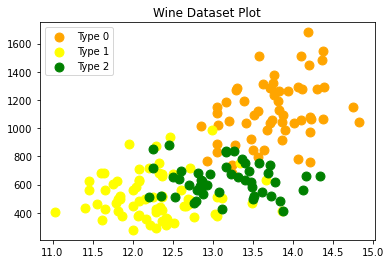

In [126]:
# Visualise Classes

plt.scatter(wine_X[wine_Y == 0, 0], wine_X[wine_Y == 0, 12], s = 80, c = 'orange', label = 'Type 0')
plt.scatter(wine_X[wine_Y == 1, 0], wine_X[wine_Y == 1, 12], s = 80, c = 'yellow', label = 'Type 1')
plt.scatter(wine_X[wine_Y == 2, 0], wine_X[wine_Y == 2, 12], s = 80, c = 'green', label = 'Type 2')

plt.title("Wine Dataset Plot")
plt.legend()

# Kmeans Clustering for Wine Dataset

In [127]:
# Wine dataset for KMeans

from sklearn.cluster import KMeans

In [128]:
# Calculating WCSS (within-cluster sums of squares) 

wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(wine_X)
    wcss.append(kmeans.inertia_)

# Elbow plot (Kmeans) for Wine dataset

Text(0, 0.5, 'WCSS')

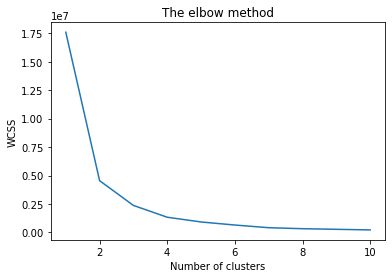

In [129]:
# Plot the WCSS

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [130]:
# Running K-Means Model

cluster_Kmeans = KMeans(n_clusters=5)
model_kmeans = cluster_Kmeans.fit(wine_X)
pred_kmeans = model_kmeans.labels_
pred_kmeans

array([3, 3, 3, 2, 0, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 0, 0, 0,
       3, 3, 0, 0, 3, 2, 0, 3, 2, 2, 3, 2, 3, 0, 0, 3, 3, 0, 0, 3, 3, 4,
       0, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 2, 1, 4, 1, 4, 1, 1, 4,
       1, 1, 0, 4, 0, 1, 1, 3, 0, 1, 1, 1, 0, 1, 1, 4, 4, 1, 1, 1, 1, 4,
       4, 4, 1, 1, 1, 1, 1, 0, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 1, 1, 4,
       4, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1,
       4, 4, 4, 4, 4, 1, 4, 4, 4, 0, 1, 4, 0, 0, 1, 4, 4, 4, 1, 1, 1, 4,
       4, 4, 1, 0, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 0, 4, 1, 1, 4, 0, 0, 0,
       0, 4])

# Kmeans Clustering plot for Wine dataset

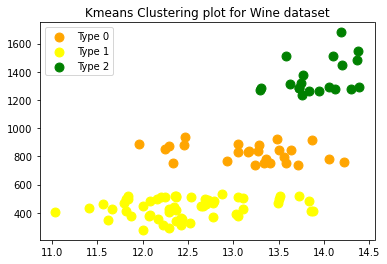

In [131]:
# Visualizing Output

plt.scatter(wine_X[pred_kmeans == 0, 0], wine_X[pred_kmeans == 0, 12], s = 80, c = 'orange', label = 'Type 0')
plt.scatter(wine_X[pred_kmeans == 1, 0], wine_X[pred_kmeans == 1, 12], s = 80, c = 'yellow', label = 'Type 1')
plt.scatter(wine_X[pred_kmeans == 2, 0], wine_X[pred_kmeans == 2, 12], s = 80, c = 'green', label = 'Type 2')

plt.title('Kmeans Clustering plot for Wine dataset')
plt.legend()

In [132]:
# Importing Libraries for Modelling.

from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [133]:
X, y = wine.data[:, :], wine.target

#Setting training and testing values

Xtrain, Xtest, y_train, y_test = train_test_split(X, y)
scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

# Modeling is done using KNN classifiers.
knn = neighbors.KNeighborsClassifier(n_neighbors=4)
knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)

print('Accuracy Score', accuracy_score(y_test, y_pred))
print('Confusion matrix',  confusion_matrix(y_test, y_pred))
print('Classification', classification_report(y_test, y_pred))

Accuracy Score 0.8888888888888888
Confusion matrix [[19  0  0]
 [ 4 12  1]
 [ 0  0  9]]
Classification               precision    recall  f1-score   support

           0       0.83      1.00      0.90        19
           1       1.00      0.71      0.83        17
           2       0.90      1.00      0.95         9

    accuracy                           0.89        45
   macro avg       0.91      0.90      0.89        45
weighted avg       0.91      0.89      0.88        45



# Logistic Regression Accuracy 

In [134]:
#Logistic Regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Logistic Regression :")
print("Accuracy = ", accuracy)
print(cm)

Logistic Regression :
Accuracy =  0.9333333333333333
[[19  0  0]
 [ 1 15  1]
 [ 0  1  8]]


# K-Nearest Neighbors Accuracy

In [135]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("K Nearest Neighbors :")
print("Accuracy = ", accuracy)
print(cm)

K Nearest Neighbors :
Accuracy =  0.8055555555555556
[[13  0  1]
 [ 0 14  2]
 [ 2  2  2]]


# Support Vector Machine Accuracy

In [136]:
#Support Vector Machine
from sklearn.svm import SVC
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
classifier = SVC()
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Support Vector Machine:")
print("Accuracy = ", accuracy)
print(cm)

Support Vector Machine:
Accuracy =  0.7777777777777778
[[13  0  1]
 [ 0 12  4]
 [ 0  3  3]]


# Decision Tree Classifier Accuracy

In [137]:
#Decision Tree Classifier
from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

classifier = DT(criterion='entropy', random_state=0)
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
print("Decision Tree Classifier :")
print("Accuracy = ", accuracy)
print(cm)

Decision Tree Classifier :
Accuracy =  0.7777777777777778
[[13  1  0]
 [ 1 14  1]
 [ 0  0  6]]


# Random Forest Classifier Accuracy

In [138]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier as RF

classifier = RF(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
print("Random Forest Classifier :")
print("Accuracy = ", accuracy)
print(cm)

Random Forest Classifier :
Accuracy =  0.7777777777777778
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


# Hierarchical clustering Analysis (HCA)

In [139]:
# Import Library

import matplotlib.pyplot as plt  
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_wine


# Hierarchical Dendrogram plot for Wine dataset

In [140]:
# Plotting of Dendrogram

import scipy.cluster.hierarchy as sch

Text(0, 0.5, 'Euclidean distance in the space with other variables')

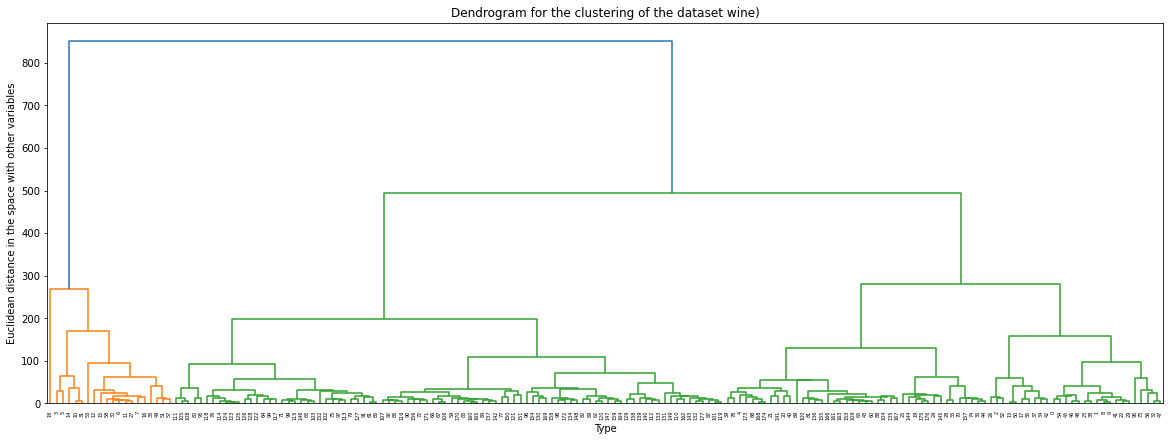

In [141]:
#Decide the number of clusters by using this dendrogram
Z = sch.linkage(wine_X, method = 'median')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z)
plt.title('Dendrogram for the clustering of the dataset wine)')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')

In [142]:
# Building an Agglomerative Clustering Model

cluster_H = AgglomerativeClustering(n_clusters=3)
model_clt = cluster_H.fit(wine_X)
model_clt
pred1 = model_clt.labels_
pred1

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int64)

# Hierarchical cluster plot for Wine dataset

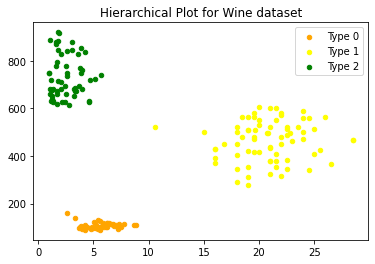

In [143]:
# Plotting the HCA Cluster

plt.scatter(wine_X[pred1 == 0, 9], wine_X[pred1 == 0, 4], s = 20, c = 'orange', label = 'Type 0')
plt.scatter(wine_X[pred1 == 1, 3], wine_X[pred1 == 1, 12], s = 20, c = 'yellow', label = 'Type 1')
plt.scatter(wine_X[pred1 == 2, 1], wine_X[pred1 == 2, 12], s = 20, c = 'green', label = 'Type 2')
plt.title('Hierarchical Plot for Wine dataset')
plt.legend()

In [144]:

import sklearn.metrics as sm
target = pd.DataFrame(wine.target)
k =3 
HClustering = AgglomerativeClustering(n_clusters=k , affinity="euclidean",linkage="ward")
HClustering.fit(wine_X)

#accuracy of the model
sm.accuracy_score(target,HClustering.labels_)

0.6966292134831461

In [145]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.9555555555555556

In [146]:
X, y = wine.data[:, :], wine.target
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

# Logistic Regression Accuracy 

In [147]:
#Logistic Regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Logistic Regression :")
print("Accuracy = ", accuracy)
print(cm)

Logistic Regression :
Accuracy =  0.9252336448598131
[[32  2  0]
 [ 4 40  2]
 [ 0  0 27]]


# K-Nearest Neighbors Accuracy

In [148]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
Xtrain, Xtest, y_train, y_test = train_test_split(X, y)
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("K Nearest Neighbors :")
print("Accuracy = ", accuracy)
print(cm)

K Nearest Neighbors :
Accuracy =  0.6666666666666666
[[10  0  1]
 [ 3 15  3]
 [ 3  5  5]]


# Support Vector Machine Accuracy

In [149]:
#Support Vector Machine
from sklearn.svm import SVC
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
classifier = SVC(random_state=0)
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Support Vector Machine:")
print("Accuracy = ", accuracy)
print(cm)

Support Vector Machine:
Accuracy =  0.7777777777777778
[[6 0 0]
 [0 6 1]
 [0 3 2]]


# Decision Tree Classifier Accuracy

In [150]:
#Decision Tree Classifier
from sklearn.model_selection import train_test_split
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

classifier = DT(criterion='entropy', random_state=0)
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
print("Decision Tree Classifier :")
print("Accuracy = ", accuracy)
print(cm)

Decision Tree Classifier :
Accuracy =  0.7777777777777778
[[18  1  0]
 [ 1 20  1]
 [ 0  0 13]]


# Random Forest Classifier Accuracy

In [151]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier as RF
Xtrain, Xtest, y_train, y_test = train_test_split(X, y)
classifier = RF(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
print("Random Forest Classifier :")
print("Accuracy = ", accuracy)
print(cm)

Random Forest Classifier :
Accuracy =  0.7777777777777778
[[17  1  0]
 [ 0 16  0]
 [ 0  0 11]]
